Number of clusters: 5
Davies-Bouldin Index: 0.8524813520458038
Silhouette Score: 0.3535127066812944
Calinski-Harabasz Index: 143.70464826443808


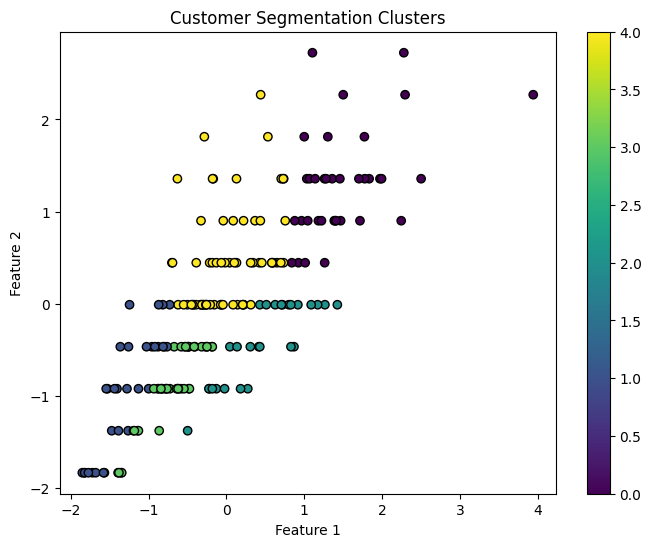

Clustering report saved to Clustering_Results.txt!


In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score
import matplotlib.pyplot as plt

# Load datasets
customers_url = 'https://drive.google.com/uc?id=1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE'
products_url = 'https://drive.google.com/uc?id=1IKuDizVapw-hyktwfpoAoaGtHtTNHfd0'
transactions_url = 'https://drive.google.com/uc?id=1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF'

customers = pd.read_csv(customers_url)
products = pd.read_csv(products_url)
transactions = pd.read_csv(transactions_url)

# Merge datasets
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

# Calculate customer features
customer_total_value = merged_data.groupby('CustomerID')['TotalValue'].sum().reset_index()
customer_transactions = merged_data.groupby('CustomerID').size().reset_index(name='TotalTransactions')
customer_avg_value = merged_data.groupby('CustomerID')['TotalValue'].mean().reset_index(name='AvgTransactionValue')

# Combine features into one DataFrame
customer_features = customer_total_value.merge(customer_transactions, on='CustomerID').merge(customer_avg_value, on='CustomerID')

# Standardize the features
features = customer_features.drop('CustomerID', axis=1)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Define the number of clusters
num_clusters = 5  # You can adjust this between 2 and 10

# KMeans clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
customer_features['Cluster'] = kmeans.fit_predict(scaled_features)

# Calculate Davies-Bouldin index
db_index = davies_bouldin_score(scaled_features, kmeans.labels_)

# Calculate additional clustering metrics
silhouette_avg = silhouette_score(scaled_features, kmeans.labels_)
ch_index = calinski_harabasz_score(scaled_features, kmeans.labels_)

# Print clustering metrics
print('Number of clusters:', num_clusters)
print('Davies-Bouldin Index:', db_index)
print('Silhouette Score:', silhouette_avg)
print('Calinski-Harabasz Index:', ch_index)

# Visualize clustering results
plt.figure(figsize=(8, 6))
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=customer_features['Cluster'], cmap='viridis', marker='o', edgecolor='k')
plt.title('Customer Segmentation Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.show()

# Save the clustering metrics to a report
with open('Clustering_Results.txt', 'w') as f:
    f.write(f'Number of clusters: {num_clusters}\n')
    f.write(f'Davies-Bouldin Index: {db_index}\n')
    f.write(f'Silhouette Score: {silhouette_avg}\n')
    f.write(f'Calinski-Harabasz Index: {ch_index}\n')

print('Clustering report saved to Clustering_Results.txt!')
